# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


# Seaborn

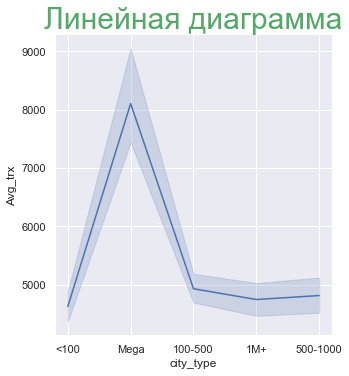

In [52]:
sns.set(style='darkgrid')  

sns.relplot(
    x='city_type', 
    y='Avg_trx',
    data=df,
    kind='line'
)
plt.title('Линейная диаграмма', size=30, color='g');

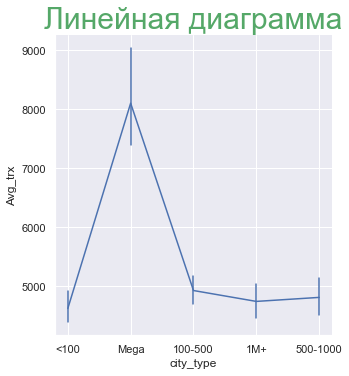

In [10]:
sns.set(style='darkgrid')  

sns.relplot(
    x='city_type', 
    y='Avg_trx',
    hue_order = ['<100','100-500','500-1000','1M+','Mega'],
    data=df,
    kind='line',
    err_style="bars",
)
plt.title('Линейная диаграмма', size=30, color='g'); 

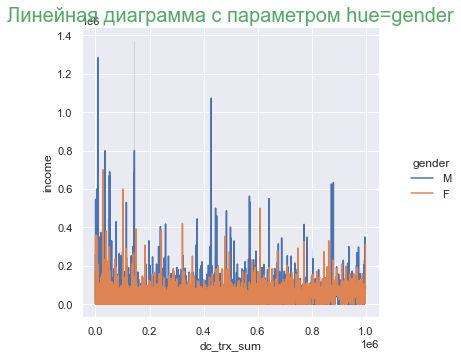

In [37]:
sns.relplot(
    x='dc_trx_sum', 
    y='income', 
    hue='gender', 
    data=df.query('dc_trx_sum<1000000'),
    kind='line')
plt.title('Линейная диаграмма с параметром hue=gender', size=20, color='g');

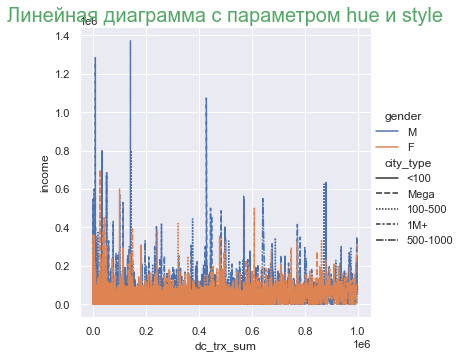

In [36]:
sns.relplot(
    x='dc_trx_sum', 
    y='income', 
    hue='gender', 
    data=df.query('dc_trx_sum<1000000'),
    style='city_type', 
    kind='line')
plt.title('Линейная диаграмма с параметром hue и style', size=20, color='g');

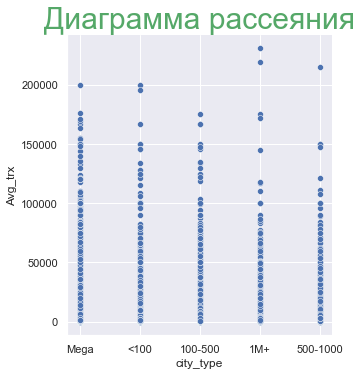

In [38]:
sns.set(style='darkgrid')  

sns.relplot(
    x='city_type', 
    y='Avg_trx',
    data=df.query('Avg_trx < 500000'),
    kind='scatter'
)
plt.title('Диаграмма рассеяния', size=30, color='g');

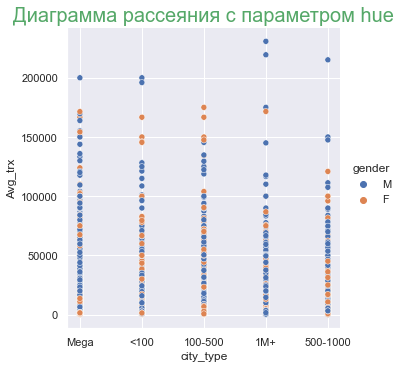

In [39]:
sns.set(style='darkgrid')  

sns.relplot(
    x='city_type', 
    y='Avg_trx',
    hue = 'gender',
    data=df.query('Avg_trx < 500000'),
    kind='scatter'
)
plt.title('Диаграмма рассеяния с параметром hue', size=20, color='g');

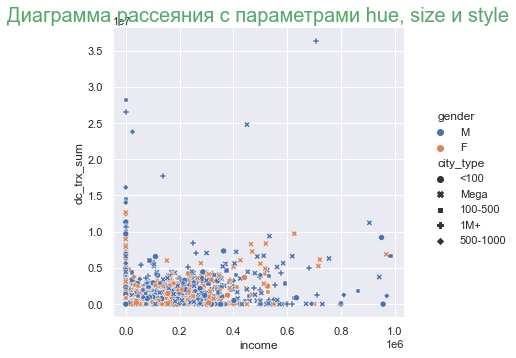

In [40]:
sns.relplot(
    x='income', 
    y='dc_trx_sum', 
    hue='gender', 
    data=df.query('income<1000000'),
    style='city_type', 
    kind='scatter')
plt.title('Диаграмма рассеяния с параметрами hue, size и style', size=20, color='g');

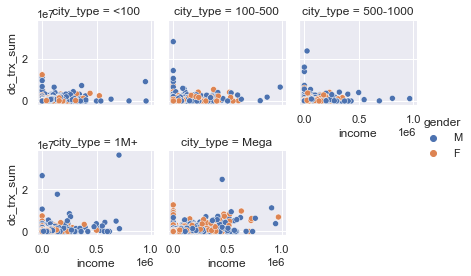

In [41]:
h_order = ['<100','100-500','500-1000','1M+','Mega']

sns.relplot(
    x='income',
    y='dc_trx_sum',
    hue='gender',
    col='city_type',
    col_wrap=3,
    col_order=h_order,
    data=df.query('income<1000000'),
    height=2
);

Text(0.5, 1.0, 'stripplot jitter=0.05')

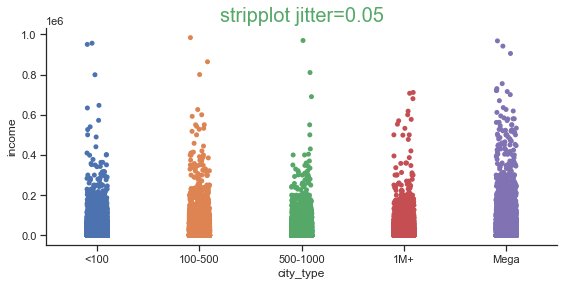

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

h_order = ['<100','100-500','500-1000','1M+','Mega']
sns.catplot(
    x='city_type',
    y='income',
    data=df.query('income<1000000'),
#    hue='gender',    # оба на одном графике разными цветами
    order=h_order, 
#    jitter=0.01,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True)

# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g')

Text(0.5, 1.0, 'stripplot jitter=0.05')

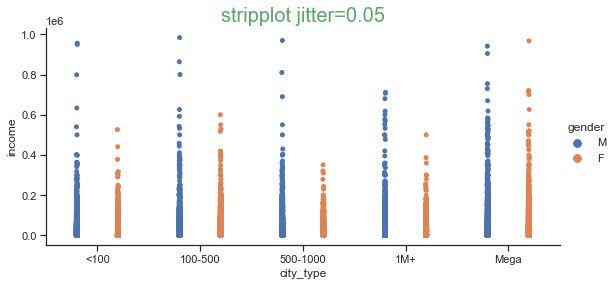

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

h_order = ['<100','100-500','500-1000','1M+','Mega']
sns.catplot(
    x='city_type',
    y='income',
    data=df.query('income<1000000'),
    hue='gender',    # оба на одном графике разными цветами
    order=h_order, 
    jitter=0.01,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True)

# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g')

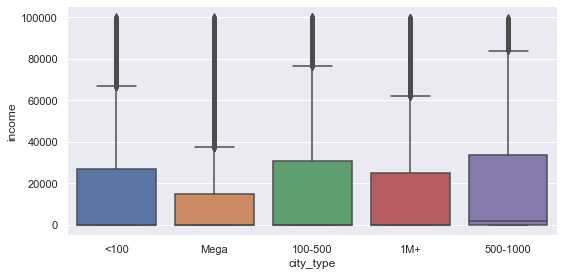

In [63]:
sns.catplot(
    x='city_type',
    y='income',
    data=df.query('income<100000'),  
    kind='box', 
    height=4, 
    aspect=2); 

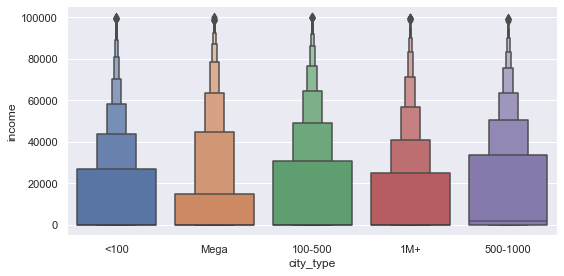

In [64]:
sns.catplot(
    x='city_type',
    y='income',
    data=df.query('income<100000'),
    kind='boxen', 
    height=4, 
    aspect=2); 

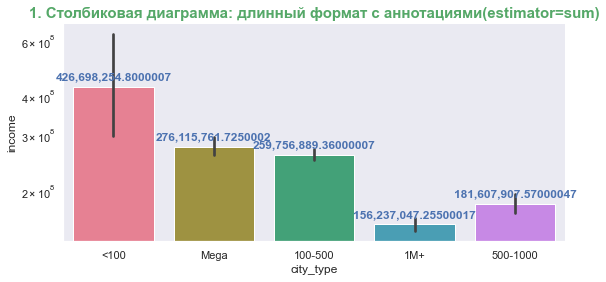

In [75]:
# possible options for estimator: numpy: median, sum, python: sum, len(for count) includes NaN
# pandas: pandas.Series.count, pandas.Series.sum ignore NaN
# in this data set mean and median are very close, and count is same for all the items so 
# these options don't reveal any thing significant 

from numpy import median

plt.figure(figsize=(9,4))
b = sns.barplot(
    x='city_type',
    y='income',
    data=df, 
    estimator=sum, 
    palette='husl')

b.set(yscale='log')
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )

plt.title('1. Столбиковая диаграмма: длинный формат с аннотациями(estimator=sum)', size=15, color='g', 
          weight='bold');

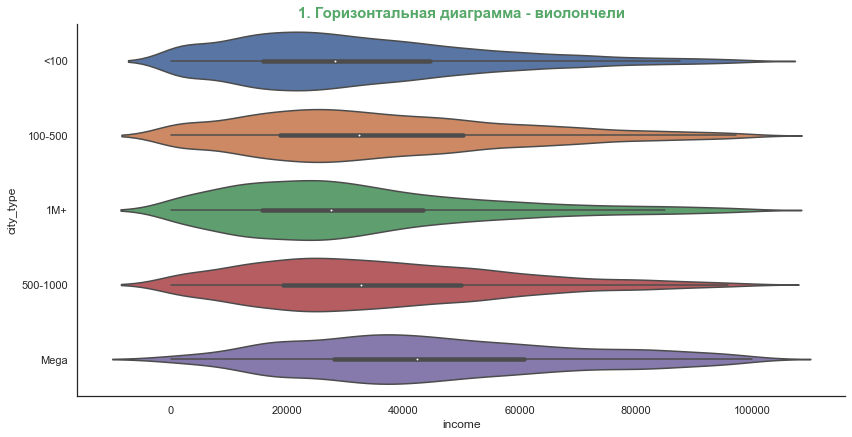

In [139]:
sns.catplot(
    x='income',
    y='city_type',
    data=df.query('income<100000 & income > 0'),
    kind='violin',
    height=6,
    aspect=2)
plt.title('1. Горизонтальная диаграмма - виолончели', size=15, color='g', weight='bold');

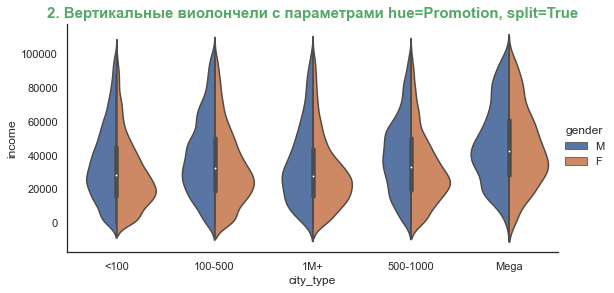

In [140]:
sns.catplot(
    x='city_type',
    y='income',
    data=df.query('income<100000 & income > 0'), 
    kind='violin', 
    hue='gender', 
#    hue_order=["Yes", "No"], 
    split=True, 
    height=4, 
    aspect=2) 

plt.title('2. Вертикальные виолончели с параметрами hue=Promotion, split=True', size=15, color='g', weight='bold');

C:\Users\79160\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\79160\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


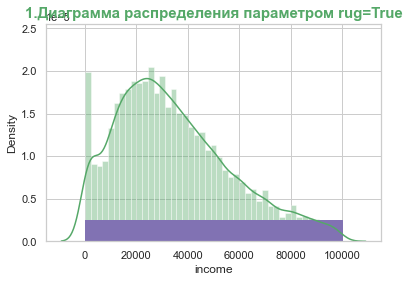

In [87]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.query('income > 0 & income < 100000').income,
    color='g', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения параметром rug=True', size=15, color='g', weight='bold')
plt.show();

C:\Users\79160\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\79160\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


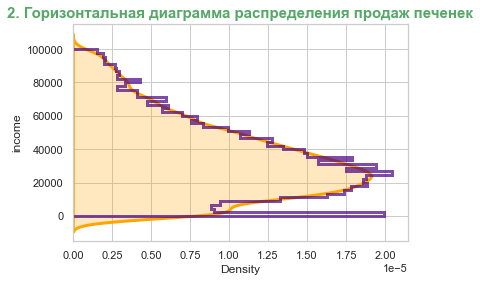

In [88]:
sns.distplot(
    df.query('income > 0 & income < 100000').income,
    vertical=True,                #hist=False
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"})           
plt.title('2. Горизонтальная диаграмма распределения продаж печенек', size=15, color='g', weight='bold')             
plt.show();

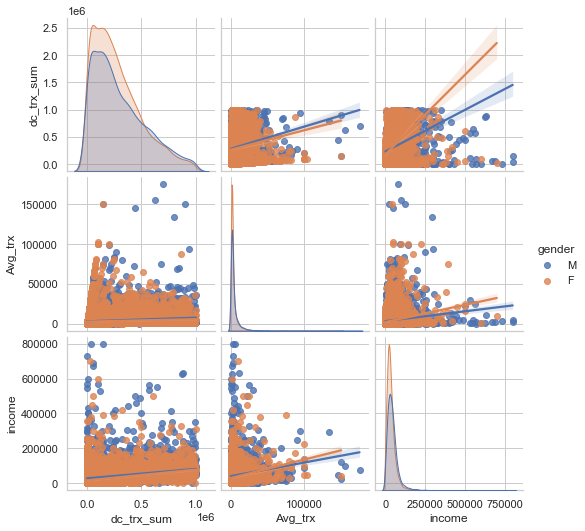

In [122]:
df_items = df.query('dc_trx_sum < 1000000 & Avg_trx < 500000 & income > 0 & income < 1000000').loc[:,['dc_trx_sum','Avg_trx','income','gender',]]
sns.pairplot(
    df_items,
    hue='gender',
    kind='reg'
)
plt.show();

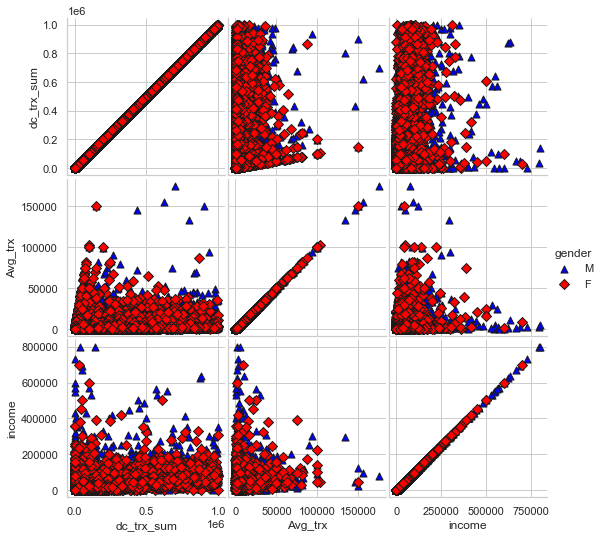

In [123]:
g = sns.PairGrid(
    df_items, 
    hue='gender', 
     hue_kws={"marker": ["^", "D"]}, 
     palette={'М': 'blue', 'F': 'red'}
)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# Подготовим данные в сводной таблицы по кварталам в строчку и по продуктам в колонках
income = pd.DataFrame(df.groupby(["city_type",'gender']).income.mean())
income = income.reset_index()
income = income.pivot('city_type','gender','income')
income.head()

gender,F,М
city_type,,
100-500,22841.777251,25177.434223
1M+,17808.541440,21997.763400
500-1000,22168.265896,28062.823723
<100,21681.491725,32182.596007
Mega,25760.995628,32862.101338


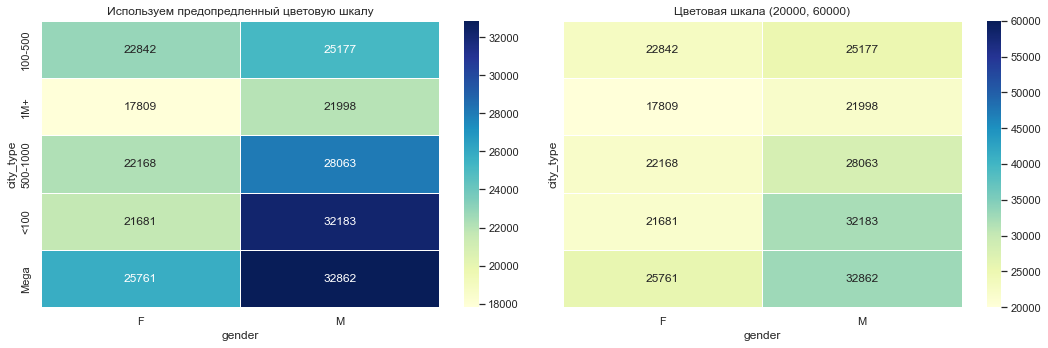

In [141]:
# Set up axes on which to plot various plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

sns.heatmap(
    income, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu", 
    ax=ax1)
ax1.set_title('Используем предопредленный цветовую шкалу')

ax2.set(title='Цветовая шкала (20000, 60000)', ylabel='')
sns.heatmap(
    income, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True, 
    vmin=20000, 
    vmax=60000,
    cmap="YlGnBu", 
    yticklabels=False, 
    ax=ax2)


plt.tight_layout()
plt.show();

# Matplotlib

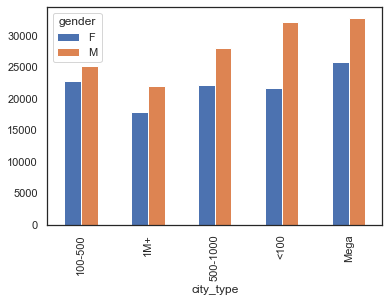

In [142]:
income.plot(kind = 'bar')
plt.show()

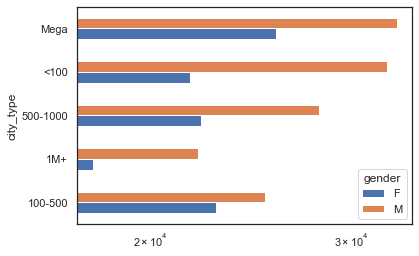

In [146]:
income.plot(kind = 'barh', logx = True)
plt.show()

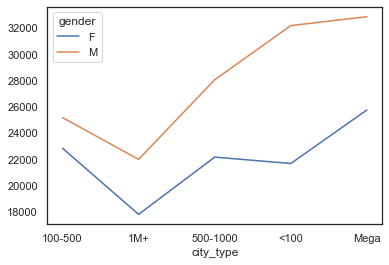

In [144]:
income.plot()
plt.show()

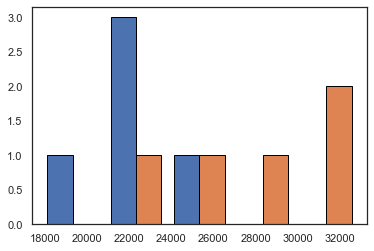

In [155]:
hist_info = plt.hist(income, bins=5, edgecolor='black')
plt.show()

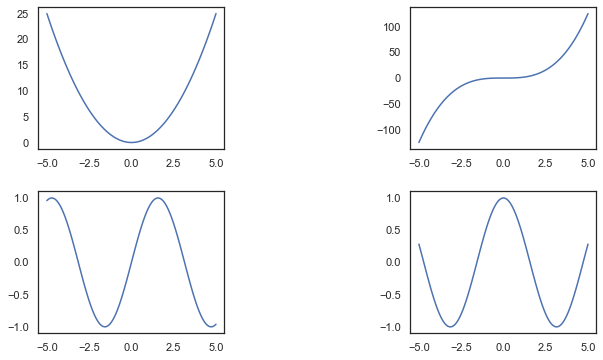

In [153]:
x = np.linspace(-5,5,101)
x2 = x**2
x3 = x**3
# Создадим 4 графика 
y = np.sin(x)
z = np.cos(x)
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3)
ax3.plot(x,y)
ax4.plot(x,z)
fig.set_size_inches(10,6)
plt.subplots_adjust(hspace=0.3,wspace=1 )